<a href="https://colab.research.google.com/github/hosein-fanai/OCR-for-Numbers-on-Cards/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR Project for Debit Cards and National ID Cards

## Loading the Project

In [1]:
try:
    import ocr
except:
    !git clone --depth 1 https://github.com/hosein-fanai/OCR-for-Numbers-on-Cards.git
    %cd "OCR-for-Numbers-on-Cards"

In [2]:
try:
    import tensorflow as tf
except:
    %pip install -r requirements.txt

In [3]:
try:
    import cv2
except:
    %pip install opencv-python

## Initializing the Project

In [4]:
import ocr.init

* Initializing constants of the project according to ./config.yaml
*
* Loaded configs from the file are:
{'input_shape': '200 320 3', 'num_poolings': 6, 'convert_bboxes_to_relative_bboxes': True, 'num_anchors': 10, 'num_classes': 10, 'batch_size': 128, 'lr': '1e-3', 'reg_coef': '4e-4', 'dropout_rate': 0.15, 'use_data_aug': True, 'train_with_masks': True, 'training_phase_2': True, 'training_phase_2_lr_divisor': '1e1', 'threshold_conf': 0.5, 'threshold_nms': 0.5, 'num_generating': 200000, 'generating_index': 0, 'do_generate': True, 'do_generate_en_cards': True, 'do_generate_per_cards': True, 'do_generate_national_ID_cards': True, 'monitor_metric': 'val_bboxes_loss', 'model_name': 'sliding_window_ocr_model', 'random_seed': 42, 'gpu_memory_limit': 6144}
* Initiation done.


## Generating a Synthesized Dataset

In [8]:
from ocr.data_synthesis import generate_whole_dataset


templates_type0, templates_type1 = generate_whole_dataset()

*                             Found #26 template(s) for credit cards.                              *
*                           Found #1 template(s) for national-ID cards.                            *
*                                                                                                  *
*        English-numbered credit card generating no.: #75000, permission to generate: True         *
*        Persian-numbered credit card generating no.: #75000, permission to generate: True         *
*              National-ID card generating no.: #50000, permission to generate: True               *
*                                                                                                  *
*                                The initial generating index is 0                                 *
*                                                                                                  *
*                                                                                          

In [9]:
print("Used templates are:\n")

templates_type0, templates_type1

Used templates are:



(['ayandeh_1.jpg',
  'ayandeh_2.jpg',
  'dey_1.jpg',
  'dey_2.jpg',
  'ghavamin_1.jpg',
  'keshavarzi_1.jpg',
  'keshavarzi_2.jpg',
  'keshavarzi_3.jpg',
  'keshavarzi_4.jpg',
  'keshavarzi_5.jpg',
  'meli_1.jpg',
  'meli_2.jpg',
  'meli_3.jpg',
  'refah_1.jpg',
  'saderat_1.jpg',
  'saderat_2.jpg',
  'saderat_3.jpg',
  'saderat_4.jpg',
  'saderat_5.jpg',
  'saman_1.jpg',
  'sepah_1.jpg',
  'shahr_1.jpg',
  'sina_1.jpg',
  'sina_2.jpg',
  'tejarat_1.jpg',
  'tejarat_2.jpg'],
 ['aa.jpg'])

### Showing randomly chosen Generated Images

In [5]:
from ocr.utilities import show_annotated_img, get_trainset_paths


trainset_images, trainset_annotations = get_trainset_paths()

len(trainset_images), len(trainset_annotations)

(199968, 199968)

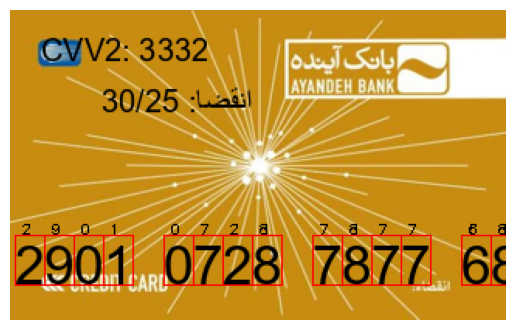

In [11]:
show_annotated_img(trainset_images[4], trainset_annotations[4])

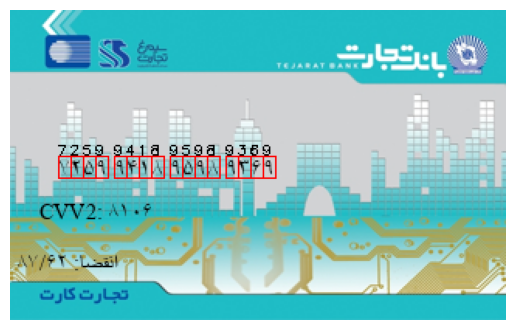

In [12]:
show_annotated_img(trainset_images[50_000], trainset_annotations[50_000])

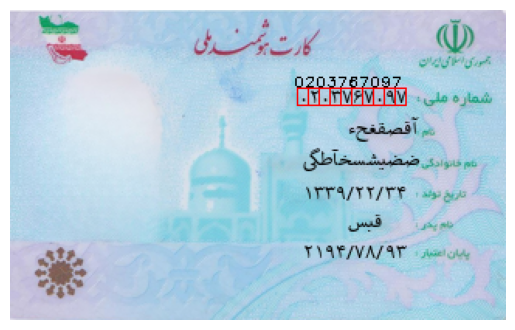

In [13]:
show_annotated_img(trainset_images[90_000], trainset_annotations[90_000])

## Preparing the Dataset

In [5]:
from ocr.data_preparation import create_dataset


trainset, valset = create_dataset()

* Found 199968 images in trainset directory.

* Splitted trainset images into two datasets: trainset#169972, validationset#29996

* Starting the extraction of annotation files.
Creating a pool of 12 processes for 169972 files.
Closed the pool. Saving the results ...

Creating a pool of 12 processes for 29996 files.
Closed the pool. Saving the results ...


* Creating tf.data.Dataset pipeline for both train and validation data.
* Successfully created the pipeline.


## Creating the Model

In [21]:
from ocr.model_creation import create_sliding_window_ocr_model


model = create_sliding_window_ocr_model("./models/sliding_window_ocr_model_Wed Mar  6 12-42-33 2024.h5")

model.summary()

Model: "sliding_window_ocr_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 200, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 data_augmentation (Sequential)  (None, 200, 320, 3)  0          ['image[0][0]']                  
                                                                                                  
 xception_preprocess (Lambda)   (None, 200, 320, 3)  0           ['data_augmentation[0][0]']      
                                                                                                  
 xception (Functional)          (None, 7, 10, 2048)  20861480    ['xception

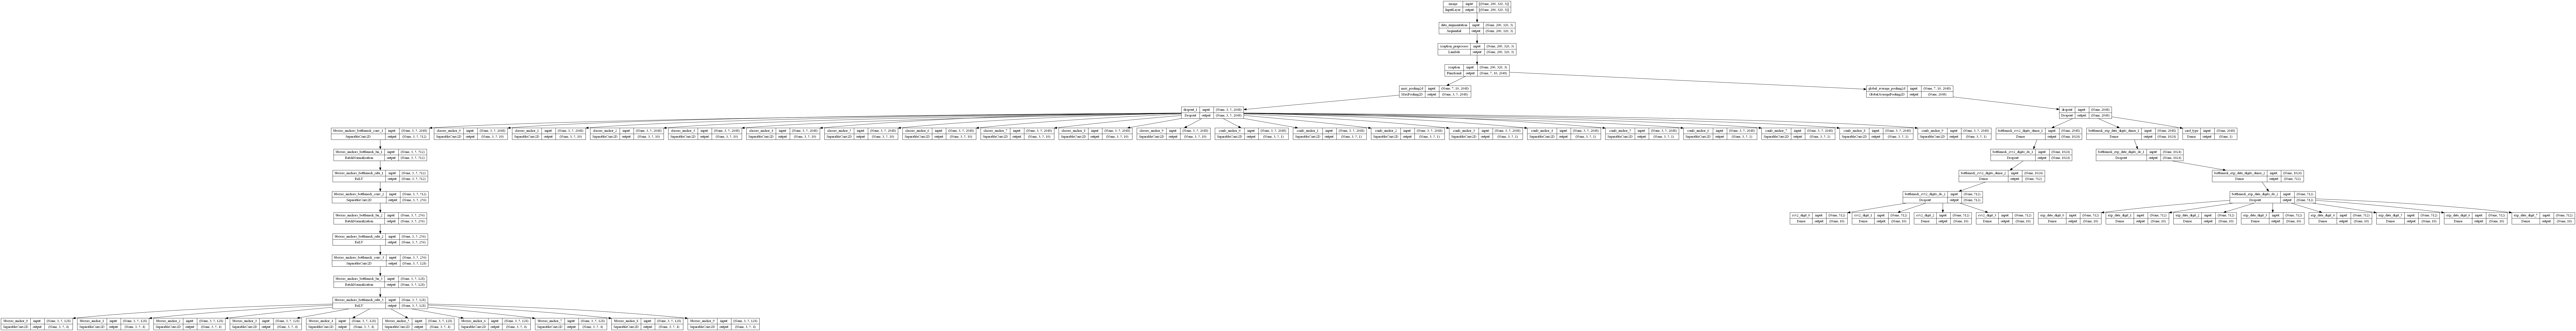

In [18]:
from ocr.model_creation import plot_model


plot_model(model)

## Training the Model

In [19]:
from ocr.callback_creation import get_callbacks_list


callbacks_list = get_callbacks_list()

In [20]:
history = model.fit(
    trainset,
    epochs=100,
    validation_data=valset,
    callbacks=callbacks_list,
).history

Epoch 1/100
2656/2656 [==============================] - 3790s 1s/step - loss: 24.4953 - bboxes_anchor_0_loss: 0.0601 - bboxes_anchor_1_loss: 0.0586 - bboxes_anchor_2_loss: 0.0614 - bboxes_anchor_3_loss: 0.0622 - bboxes_anchor_4_loss: 0.0638 - bboxes_anchor_5_loss: 0.0658 - bboxes_anchor_6_loss: 0.0648 - bboxes_anchor_7_loss: 0.0634 - bboxes_anchor_8_loss: 0.0619 - bboxes_anchor_9_loss: 0.0531 - card_type_loss: 0.0026 - classes_anchor_0_loss: 0.0015 - classes_anchor_1_loss: 0.0015 - classes_anchor_2_loss: 0.0014 - classes_anchor_3_loss: 0.0015 - classes_anchor_4_loss: 0.0016 - classes_anchor_5_loss: 0.0015 - classes_anchor_6_loss: 0.0014 - classes_anchor_7_loss: 0.0014 - classes_anchor_8_loss: 0.0017 - classes_anchor_9_loss: 2.1563 - confs_anchor_0_loss: 2.2109 - confs_anchor_1_loss: 2.2032 - confs_anchor_2_loss: 2.2258 - confs_anchor_3_loss: 2.2175 - confs_anchor_4_loss: 2.1888 - confs_anchor_5_loss: 2.2042 - confs_anchor_6_loss: 2.2127 - confs_anchor_7_loss: 2.2099 - confs_anchor_8_l

## Plotting the Training Metrics

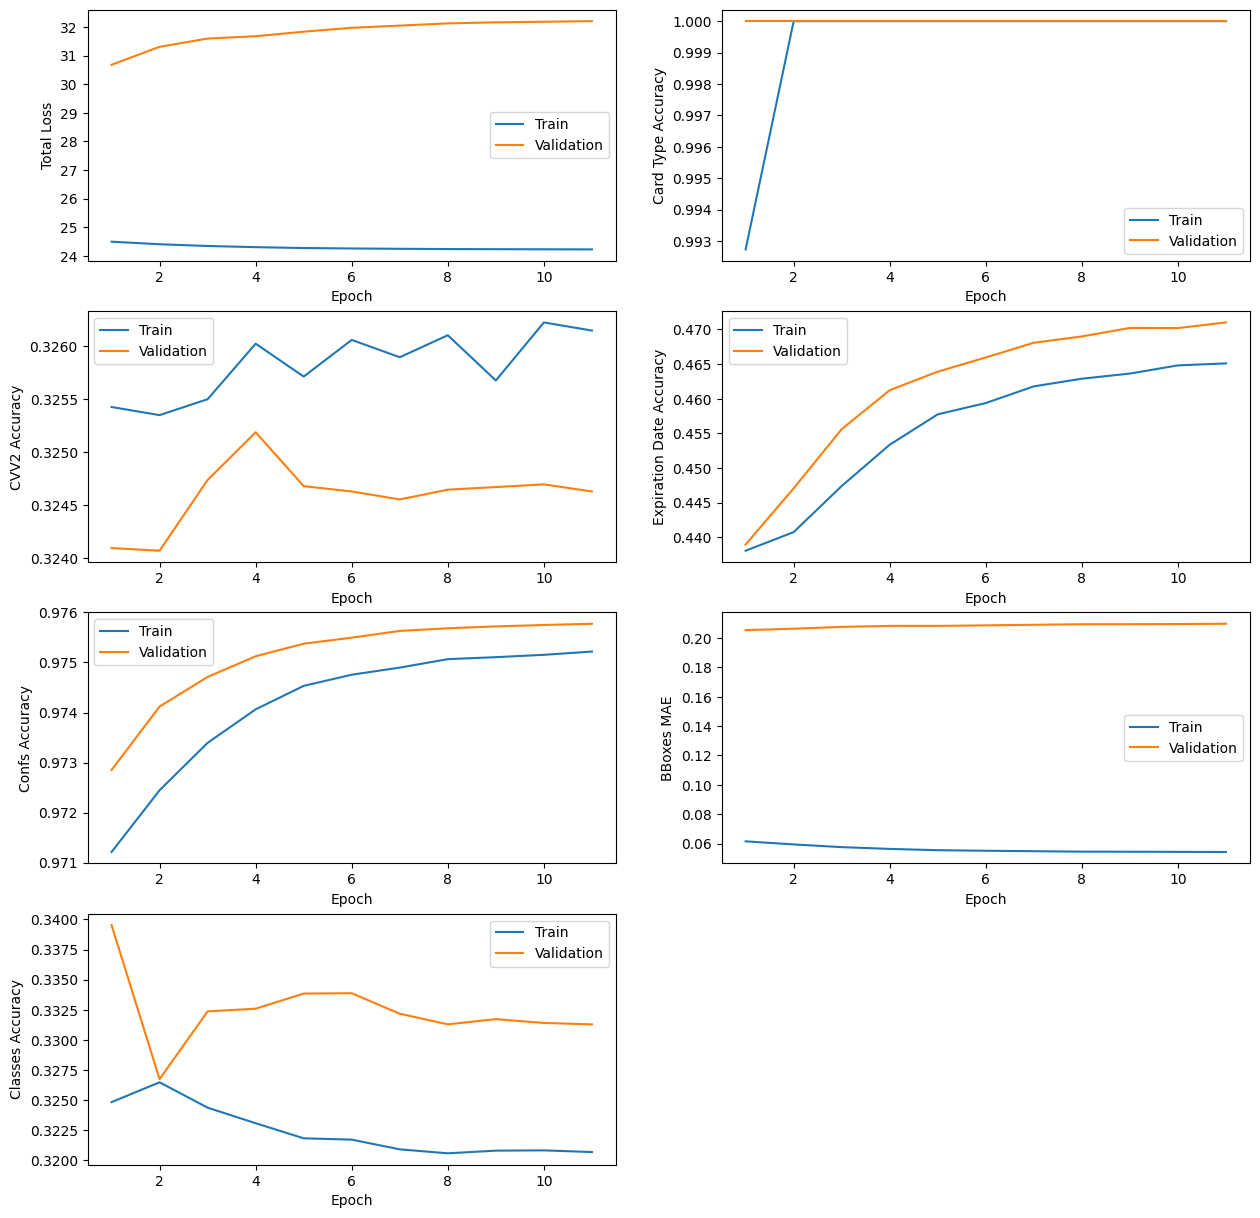

In [21]:
from ocr.history_plotting import plot_history


plot_history(history)

## Predicting by the Model

In [36]:
from ocr.model_creation import load_model


model = load_model()

In [ ]:
from ocr.utilities import get_trainset_paths
from ocr.data_preparation import split_dataset


x_train, x_val, _, _ = split_dataset(get_trainset_paths)

1/1 [==============================] - 2s 2s/step
Confidence Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Found Classes: [6, 4, 3, 8, 8, 6, 6, 6, 4, 7]
Found Objects #: 10

Card Type: 0.9980142116546631
CVV2: 0000
Expiration Date: 6626/68/79


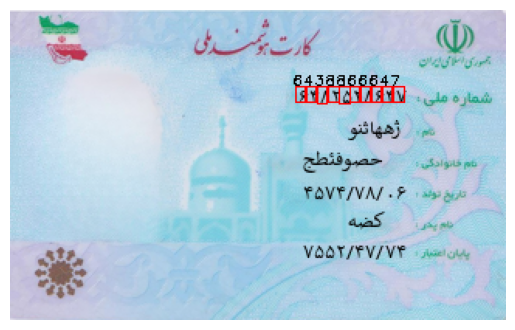

In [37]:
from ocr.utilities import predict_and_show


predict_and_show(model, x_train[10])

1/1 [==============================] - 0s 45ms/step
Confidence Scores: [0.93, 0.95, 0.62, 0.58, 0.77, 0.96, 0.88, 0.91, 0.79, 0.92, 0.8, 0.66]
Found Classes: [6, 8, 8, 7, 7, 9, 2, 3, 5, 1, 4, 8]
Found Objects #: 12

Card Type: 0.0009967738296836615
CVV2: 3335
Expiration Date: 0000/49/45


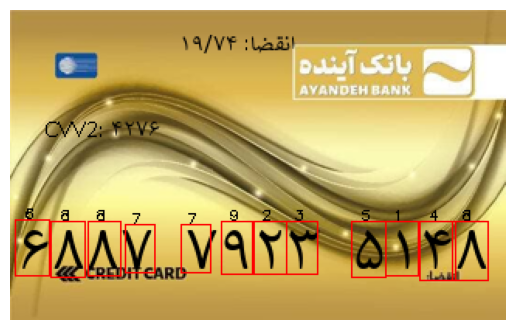

In [42]:
predict_and_show(model, x_train[5])

1/1 [==============================] - 0s 50ms/step
Confidence Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Found Classes: [3, 5, 0, 5, 5, 5, 5, 5, 5, 6]
Found Objects #: 10

Card Type: 0.9971786737442017
CVV2: 0000
Expiration Date: 6696/38/79


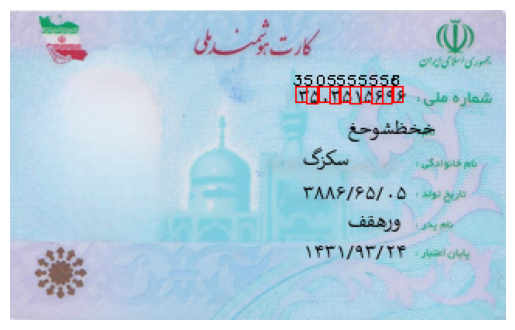

In [43]:
predict_and_show(model, x_val[0])

1/1 [==============================] - 0s 48ms/step
Confidence Scores: [0.99, 0.99, 0.94, 0.94, 0.89, 0.99, 0.95, 0.81, 1.0, 0.92, 0.86, 0.62, 0.88, 0.97, 0.99]
Found Classes: [7, 9, 1, 4, 4, 4, 4, 6, 3, 1, 1, 8, 9, 3, 8]
Found Objects #: 15

Card Type: 0.0010934298625215888
CVV2: 6385
Expiration Date: 0000/46/41


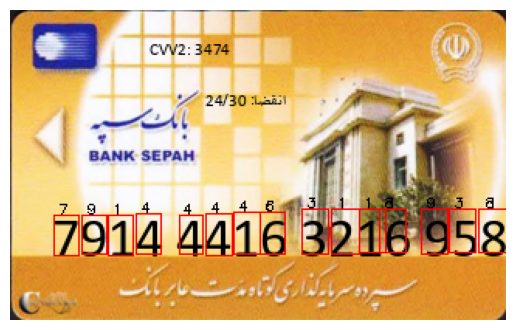

In [44]:
predict_and_show(model, x_val[10])